In [48]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [49]:
dataset_dir = "Datasets/Plant-Village"
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [50]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir, 
    shuffle=True, 
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [51]:
class_name = dataset.class_names

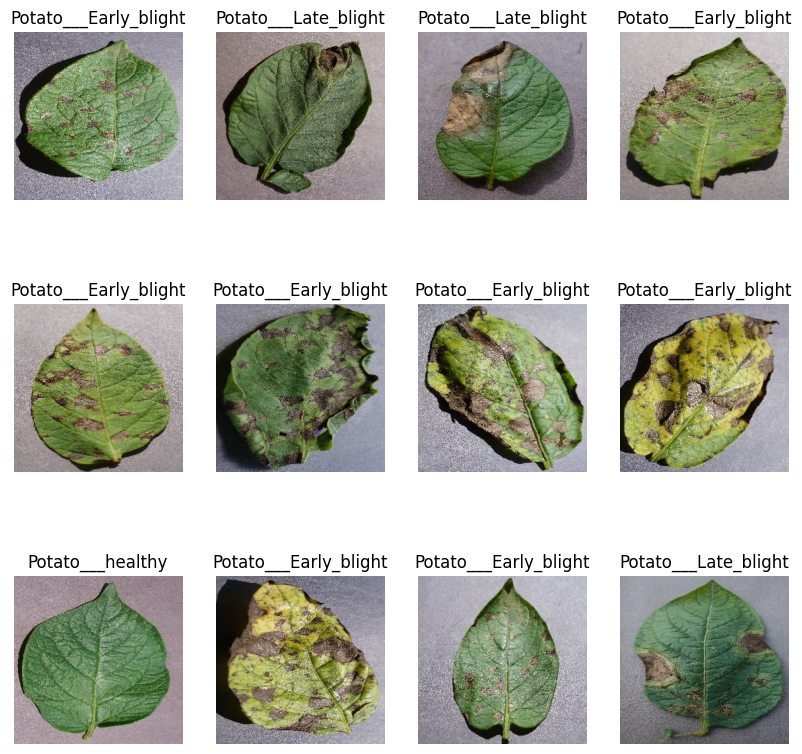

In [52]:
# datatset.take() method takes the number of batches that needs to be processed. Here 1 means only first batch is taken for visualization
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

80% ==> training dataset
20% ==> 10% validation, 10% testing

from 68 batches that we have, we take 80% of them for training i.e first 54 batches.

In [53]:
train_data = dataset.take(54)
len(train_data)

54

In [54]:
test_data = dataset.skip(54)
len(test_data)

14

In [55]:
validation_ds = test_data.take(6)
testing_data = test_data.skip(6)

In [56]:
def get_dataset_partition(ds, train_split=0.8, validation_split=0.1, testing_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(ds_size*train_split)
    train_ds = ds.take(train_size)
    
    val_size = int(ds_size*validation_split)
    validation_ds = ds.skip(train_size).take(val_size)
    testing_data = ds.skip(train_size).skip(val_size)
    
    return train_ds, validation_ds, testing_data

In [57]:
train_ds, validation_ds, testing_data = get_dataset_partition(dataset)

In [58]:
print(len(train_ds))
print(len(validation_ds))
print(len(testing_data))

54
6
8


In [59]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testing_data = testing_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [63]:
# scale the data for better training
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [64]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])